<h1><center> Property Sales Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Read Data 

rawDf = pd.read_csv("PropertyPrice_Data.csv")
predictionDf = pd.read_csv("PropertyPrice_Prediction.csv")

rawDf.shape, predictionDf.shape

((1459, 26), (1459, 26))

In [3]:
# Split Train/test and Concat

trainDf, testDf = train_test_split(rawDf, train_size=0.8, random_state=150)

trainDf["Source"] = "Train"
testDf["Source"] = "Test"
predictionDf["Source"] = "Prediction"

fullRawDf = pd.concat((trainDf,testDf,predictionDf),axis=0)
fullRawDf.shape

(2918, 27)

In [4]:
# Drop Identifiers

fullRawDf.head()
fullRawDf.drop("Id",axis=1,inplace=True)

fullRawDf.head()

,Road_Type,Property_Shape,House_Type,House_Condition,Construction_Year,Remodel_Year,BsmtFinSF1,Total_Basement_Area,Air_Conditioning,First_Floor_Area,...,Rooms_Above_Grade,Fireplaces,Garage,Garage_Built_Year,Garage_Area,Pool_Area,Miscellaneous_Value,Year_Sold,Sale_Price,Source
56,Paved,Reg,Twnhs,5,1999,2000,649,970,Y,983,...,7,0,Attchd,1999.0,742.697147,0,0,2009,172500.0,Train
392,Paved,IR1,1Fam,7,1959,1959,0,0,Y,882,...,5,0,Attchd,1959.0,409.340977,0,1200,2007,106500.0,Train
176,Paved,IR1,1Fam,5,1988,1989,831,1151,Y,1164,...,8,1,Attchd,1988.0,257.352391,0,0,2007,211000.0,Train
342,Paved,Reg,Duplex,4,1949,1950,0,0,N,1040,...,6,0,Detchd,1949.0,38.984100,0,0,2006,87500.0,Train
446,Paved,IR1,1Fam,6,1966,2002,247,1517,Y,1888,...,6,1,Attchd,1966.0,459.927746,0,0,2010,190000.0,Train


In [5]:
# NaN Analysis & Treatment

fullRawDf.isna().sum() # Garage, Garage_Built_Year & Sales_Price are NaN, Slaes_Price(IGNORE) NaN is Prediction.
fullRawDf[fullRawDf["Garage"].isna()]

fullRawDf.dtypes # Garage: Categorical, Garage_Built_Year: Continuous

# Fill NaN

for col in fullRawDf.columns:
    if col != "Sale_Price" and fullRawDf[col].isna().any() == True:

        if fullRawDf[col].dtype == "object":
            tempMode =  fullRawDf.loc[fullRawDf["Source"] == "Train", col].mode()[0]
            fullRawDf[col].fillna(tempMode,inplace=True)
        else:
            tempMedian = fullRawDf.loc[fullRawDf["Source"] ==  "Train", col].median()
            fullRawDf[col].fillna(tempMedian,inplace=True)

fullRawDf.isna().sum() # Only Sale_Price should have NaNs

Road_Type                       0
Property_Shape                  0
House_Type                      0
House_Condition                 0
Construction_Year               0
Remodel_Year                    0
BsmtFinSF1                      0
Total_Basement_Area             0
Air_Conditioning                0
First_Floor_Area                0
Second_Floor_Area               0
LowQualFinSF                    0
Underground_Full_Bathroom       0
Full_Bathroom_Above_Grade       0
Bedroom_Above_Grade             0
Kitchen_Quality                 0
Rooms_Above_Grade               0
Fireplaces                      0
Garage                          0
Garage_Built_Year               0
Garage_Area                     0
Pool_Area                       0
Miscellaneous_Value             0
Year_Sold                       0
Sale_Price                   1459
Source                          0
dtype: int64

## Bivariate Analysis

### Continuous Columns

For **Continuous** we can check **Correlation** 
## $$Cor(x,y) = \frac{Covariance(x,y)}{(std(x)std(y)}$$

In [6]:
%matplotlib inline

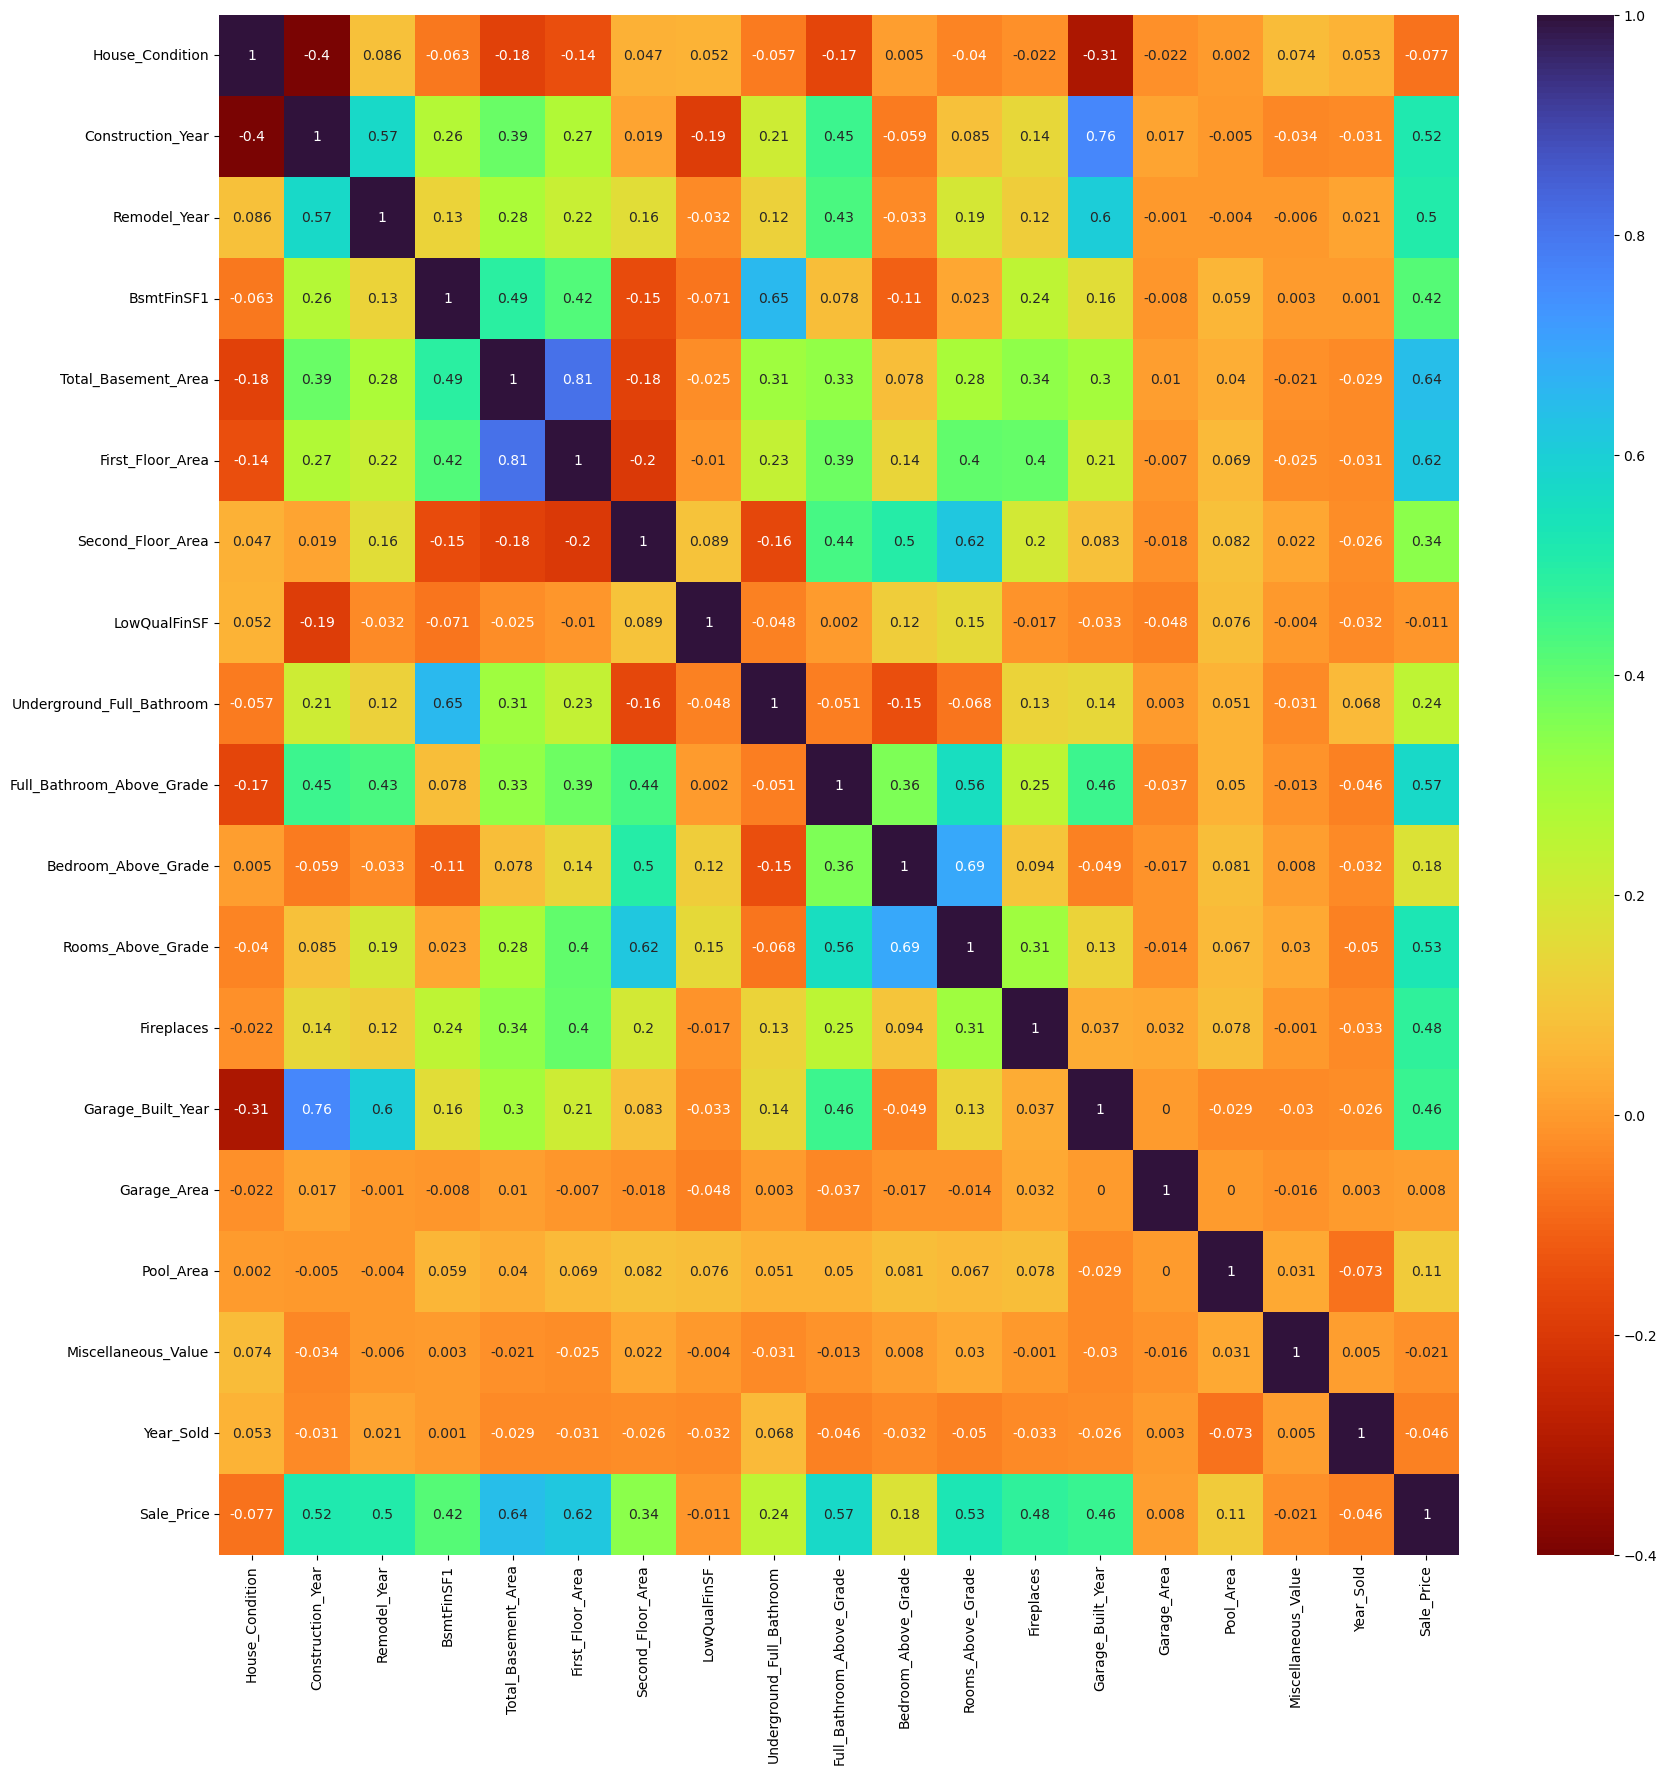

In [7]:
corrDf =  fullRawDf[fullRawDf["Source"] == "Train"].corr().round(decimals=3)

plt.figure(figsize=(20,20))
sns.heatmap(corrDf,
           xticklabels=corrDf.columns,
           yticklabels=corrDf.columns,
           cmap="turbo_r", annot=True)
plt.show()

---

<h1> <center> Relationship Analysis

## Dependent Columns

In [8]:
saleCorrDf = corrDf.copy()
saleCorrDf.drop("Sale_Price",axis=0,inplace=True)

#### Highly Positive

- We can conclude from data that the highest independent feature showing relationship of $\boldsymbol {0.064 0}$ with Sale_Price is  **Total_Basement_Area**.
    - Table as follows:-

In [36]:
saleCorrDf["Sale_Price"][saleCorrDf["Sale_Price"] > 0.5].reset_index().sort_values("Sale_Price",
                                                                                   ascending=False
                                                                                  )

,index,Sale_Price
2,Total_Basement_Area,0.640
3,First_Floor_Area,0.621
4,Full_Bathroom_Above_Grade,0.571
5,Rooms_Above_Grade,0.525
0,Construction_Year,0.515
1,Remodel_Year,0.503


#### $*$ Lowest Value of Correaltion is 0.4, hence no feature displays highly negative relationship

## Independent Columns

### Continuous 

#### House_Condition

- We can conclude that **House_Condition** has **no highly positive** relationship with any **Independent features**

In [10]:
hcCorrDf = saleCorrDf.copy()
hcCorrDf.drop("House_Condition",axis = 0,inplace=True)
hcCorrDf["House_Condition"][hcCorrDf["House_Condition"] > 0.5].reset_index().sort_values("House_Condition",
                                                                                         ascending=False                                                                                                                                                                              
                                                                                        )

,index,House_Condition


#### Construction Year

- **Garage_Built_Year** & **Remodel_Year** shows high positive relatioship with **Construction_Year**
- Chances of _**MultiColinearity**_
    - Table as follows:-

In [11]:
cyCorrDf =  saleCorrDf.copy()
cyCorrDf.drop("Construction_Year",axis=0,inplace=True)
cyCorrDf["Construction_Year"][cyCorrDf["Construction_Year"] > 0.5].reset_index().sort_values("Construction_Year",
                                                                                            ascending=False
                                                                                            )

,index,Construction_Year
1,Garage_Built_Year,0.761
0,Remodel_Year,0.568


#### Remodel_Year

- **Garage_Built_Year** & **Construction_Year** shows high positive relationship with **Remodel_Year**.
- Chances of _**MultiColinearity**_
    - Table as follows:-

In [12]:
ryCorrDf =  saleCorrDf.copy()
ryCorrDf.drop("Remodel_Year",axis=0,inplace=True)
ryCorrDf["Remodel_Year"][ryCorrDf["Remodel_Year"] > 0.5].reset_index().sort_values("Remodel_Year",
                                                                                  ascending=False
                                                                                  )

,index,Remodel_Year
1,Garage_Built_Year,0.605
0,Construction_Year,0.568


#### BsmtFinSF1

- **Underground_Full_Bathroom** shows high positive relationship with **BsmtFinSF1**.
- Chances of _**MultiColinearity**_
    - Table as follows:-

In [13]:
bfsCorrDf = saleCorrDf.copy()
bfsCorrDf.drop("BsmtFinSF1", axis=0, inplace=True)
bfsCorrDf["BsmtFinSF1"][bfsCorrDf["BsmtFinSF1"] > 0.5].reset_index().sort_values("BsmtFinSF1",
                                                                                ascending=False)

,index,BsmtFinSF1
0,Underground_Full_Bathroom,0.65


#### Total_Basement_Area

- **First_Floor_Area** shows high positive relationship with **Total_Basement_Area**.
- Chances of _**MultiColinearity**_
    - Table as follows:-

In [14]:
tbaCorrDf = saleCorrDf.copy()
tbaCorrDf.drop("Total_Basement_Area",axis=0, inplace=True)
tbaCorrDf["Total_Basement_Area"][tbaCorrDf["Total_Basement_Area"] > 0.5].reset_index().sort_values("Total_Basement_Area",
                                                                                                  ascending=False
                                                                                                  )

,index,Total_Basement_Area
0,First_Floor_Area,0.812


#### First_Floor_Area

- **Total_Basement_Area** shows high positive relationship with **First_Floor_Area**.
- Chances of _**MultiColinearity**_
    - Table as follows:-

In [15]:
ffaCorrDf = saleCorrDf.copy()
ffaCorrDf.drop("First_Floor_Area",axis=0, inplace=True)
ffaCorrDf["First_Floor_Area"][ffaCorrDf["First_Floor_Area"] > 0.5].reset_index().sort_values("First_Floor_Area",
                                                                                            ascending=False
                                                                                            )

,index,First_Floor_Area
0,Total_Basement_Area,0.812


#### Second_Floor_Area

- **Rooms_Above_Grade** shows high positive relationship with **Second_Floor_Area**.
- Chances of _**MultiColinearity**_
    - Table as follows:-

In [16]:
sfaCorrDf = saleCorrDf.copy()
sfaCorrDf.drop("Second_Floor_Area",axis=0, inplace=True)
sfaCorrDf["Second_Floor_Area"][sfaCorrDf["Second_Floor_Area"] > 0.5].reset_index().sort_values("Second_Floor_Area",
                                                                                               ascending=False
                                                                                              )

,index,Second_Floor_Area
0,Rooms_Above_Grade,0.62


#### LowQualFinSF

- We can conclude that **LowQualFinSF** has **no highly positive** relationship with any **Independent features**

In [17]:
lqfsCorrDf = saleCorrDf.copy()
lqfsCorrDf.drop("LowQualFinSF",axis=0,inplace=True)
lqfsCorrDf["LowQualFinSF"][lqfsCorrDf["LowQualFinSF"] > 0.5].reset_index().sort_values("LowQualFinSF", 
                                                                                       ascending=False
                                                                                      )

,index,LowQualFinSF


#### Underground_Full_Bathroom

- **BsmtFinSF1** shows high positive relationship with **Underground_Full_Bathroom**.
- Chances of _**MultiColinearity**_
    - Table as follows:-

In [18]:
ufbCorrDf = saleCorrDf.copy()
ufbCorrDf.drop("Underground_Full_Bathroom",axis=0,inplace=True)
ufbCorrDf["Underground_Full_Bathroom"][ufbCorrDf["Underground_Full_Bathroom"] > 0.5].reset_index().sort_values("Underground_Full_Bathroom", 
                                                                                                               ascending=False
                                                                                                              )

,index,Underground_Full_Bathroom
0,BsmtFinSF1,0.65


#### Full_Bathroom_Above_Grade

- **Room_Above_Grade** shows high positive relationship with **Full_Bathroom_Above_Grade**
- Chances of MultiColinearity
    - Table as follows:-

In [19]:
fbagCorrDf = saleCorrDf.copy()
fbagCorrDf.drop("Full_Bathroom_Above_Grade",axis=0, inplace=True)
fbagCorrDf["Full_Bathroom_Above_Grade"][fbagCorrDf["Full_Bathroom_Above_Grade"] > 0.5].reset_index().sort_values("Full_Bathroom_Above_Grade",
                                                                                                                 ascending=False
                                                                                                                )

,index,Full_Bathroom_Above_Grade
0,Rooms_Above_Grade,0.557


#### Bedroom_Above_Grade

- **Room_Above_Grade** shows high positive relationship with **Bedroom_Above_Grade**
- Chances of MultiColinearity
    - Table as follows:-

In [20]:
bagCorrDf = saleCorrDf.copy()
bagCorrDf.drop("Bedroom_Above_Grade",axis=0, inplace=True)
bagCorrDf["Bedroom_Above_Grade"][bagCorrDf["Bedroom_Above_Grade"] > 0.5].reset_index().sort_values("Bedroom_Above_Grade",
                                                                                                   ascending=False
                                                                                                  )

,index,Bedroom_Above_Grade
0,Rooms_Above_Grade,0.689


#### Room_Above_Grade

- **Bedroom_Above_Grade** shows high positive relationship with **Room_Above_Grade**
- Chances of MultiColinearity
    - Table as follows:-

In [21]:
ragCorrDf = saleCorrDf.copy()
ragCorrDf.drop("Rooms_Above_Grade",axis=0, inplace=True)
ragCorrDf["Rooms_Above_Grade"][ragCorrDf["Rooms_Above_Grade"] > 0.5].reset_index().sort_values("Rooms_Above_Grade",
                                                                                                   ascending=False
                                                                                                  )

,index,Rooms_Above_Grade
2,Bedroom_Above_Grade,0.689
0,Second_Floor_Area,0.620
1,Full_Bathroom_Above_Grade,0.557


#### Fireplaces

- We can conclude that **Fireplaces** has **no highly positive** relationship with any **Independent features**

In [22]:
fCorrDf = saleCorrDf.copy()
fCorrDf.drop("Fireplaces",axis=0,inplace=True)
fCorrDf["Fireplaces"][fCorrDf["Fireplaces"] > 0.5].reset_index().sort_values("Fireplaces",
                                                                            ascending=False)

,index,Fireplaces


#### Garage_Built_Year

- **Remodel_Year** & **Construction_Year**shows high positive relationship with **Garage_Built_Year**
- It has 0 relationship with Garage_Area
- Chances of MultiColinearity
    - Table as follows:-
    


In [23]:
gbyCorrDf = saleCorrDf.copy()
gbyCorrDf.drop("Garage_Built_Year",axis=0,inplace=True)
gbyCorrDf["Garage_Built_Year"][gbyCorrDf["Garage_Built_Year"] > 0.5].reset_index().sort_values("Garage_Built_Year",
                                                                                              ascending=False
                                                                                              )

,index,Garage_Built_Year
0,Construction_Year,0.761
1,Remodel_Year,0.605


#### Garage_Area, Pool_Area, Miscellaneous_Value, Year_Sold

- These all have **no highly positive** relationship with any **Independent features**
    - Garage_Area has no relationship with Garage_Built_Year & Pool_Area
    - Pool_Area has no relationship with Garage_Area

In [24]:
### Automating rest
for col in ["Garage_Area","Pool_Area","Miscellaneous_Value","Year_Sold"]:
    if col!="Sale_Price":
        tempDf = saleCorrDf.copy()
        tempDf.drop(col,axis=0,inplace=True)
        tempDf = tempDf[col][tempDf[col] > 0.5].reset_index().sort_values(col,ascending=False)
        print(f"\n{col}:- \n")
        display(tempDf)


Garage_Area:- 



,index,Garage_Area



Pool_Area:- 



,index,Pool_Area



Miscellaneous_Value:- 



,index,Miscellaneous_Value



Year_Sold:- 



,index,Year_Sold


### Categorical

In [25]:
%matplotlib inline

In [26]:
categDf = fullRawDf.select_dtypes(include="object")
categDf["Sale_Price"] = fullRawDf["Sale_Price"][(fullRawDf["Source"]=="Train")]
categDf.drop("Source",axis=1,inplace=True)
categDf.head()

,Road_Type,Property_Shape,House_Type,Air_Conditioning,Kitchen_Quality,Garage,Sale_Price
56,Paved,Reg,Twnhs,Y,Gd,Attchd,172500.0
392,Paved,IR1,1Fam,Y,TA,Attchd,106500.0
176,Paved,IR1,1Fam,Y,TA,Attchd,211000.0
342,Paved,Reg,Duplex,N,TA,Detchd,87500.0
446,Paved,IR1,1Fam,Y,Gd,Attchd,190000.0


In [27]:
"""
for col in categDf.columns:
    if col != "Source":
        if categDf[col].dtype == "object":
            plt.figure(figsize=(5,5))
            sns.boxplot(y= categDf["Sale_Price"], x=categDf[col])
            plt.show()
"""

'\nfor col in categDf.columns:\n    if col != "Source":\n        if categDf[col].dtype == "object":\n            plt.figure(figsize=(5,5))\n            sns.boxplot(y= categDf["Sale_Price"], x=categDf[col])\n            plt.show()\n'

#### Garage

- (Attchd + BuiltIn + 2TFess) can be combined in can be combined or dropped since they have similar effect on Sale_Price
- (Detchd  +  Basement Garage + Carport + 2Types) can be combined or dropped since they have similar effect on Sale_Price
- Attchd, Detchd, Basement Garage have significantly higher no of outliers when compared to others
- 2Types & 2Tfess have no outliers
- Builtin has a highest median effecting the Sale_Price
- Carport InterQuartile Q3 Box is almost same as the max value.



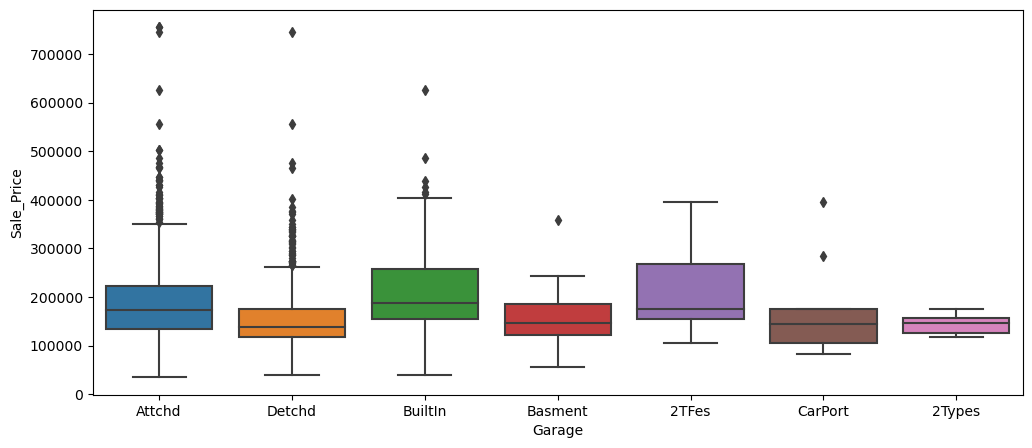

In [28]:
plt.figure(figsize=(12,5))
sns.boxplot(y= categDf["Sale_Price"], x=categDf["Garage"])
plt.show()

#### Property_Shape

- IR2,IR3,IR1 can be combined or dropped since they have similar effect on Sale_Price
- Reg & IR1 have significantly higher number of outliers than others.

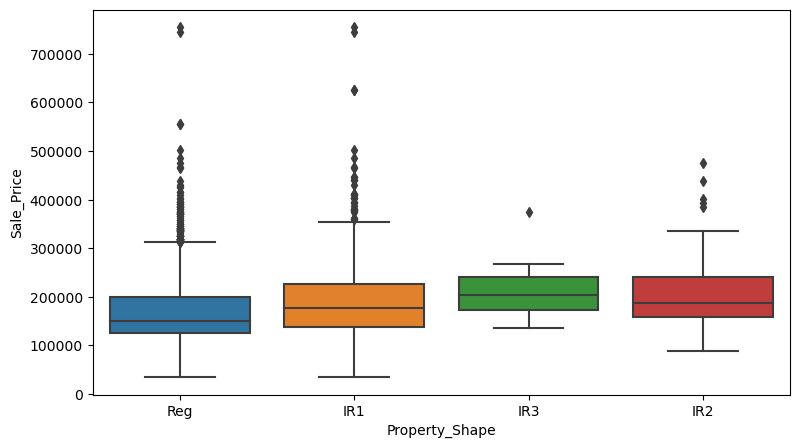

In [29]:
plt.figure(figsize=(9,5))
sns.boxplot(y= categDf["Sale_Price"], x=categDf["Property_Shape"])
plt.show()

#### House_Type

- Twnhs, Duplex, 2fmCon can be combined or dropped since they have similar effect on Sale_Price
- 1Fam & TwnhsE can be combine or dropped since they have similar effect on Sale_Price
- 1Fam has significantly more outliers than compared to others
- Twnshe has highest median with respect to Sale_Price among others
- 2fmcom has least median value with respect to Sale_Price when compared among others
- 2fmCon mean is impacted heavily by Outliers

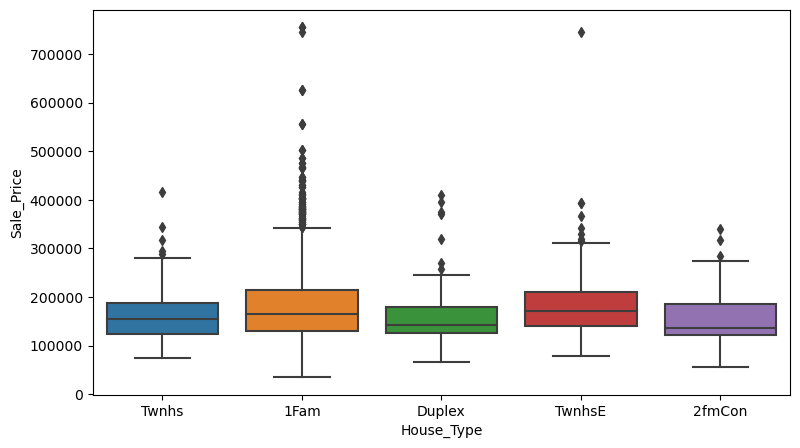

In [30]:
plt.figure(figsize=(9,5))
sns.boxplot(y= categDf["Sale_Price"], x=categDf["House_Type"])
plt.show()

#### Air_Conditioning

- Y has significantly more outliers than N
- Y impacts Sale_price more than N

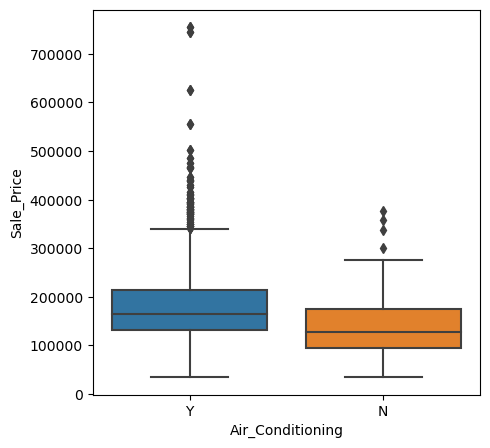

In [31]:
plt.figure(figsize=(5,5))
sns.boxplot(y= categDf["Sale_Price"], x=categDf["Air_Conditioning"])
plt.show()

#### Kitchen_Quality

- Ex has most impact on Sales_Price
- Fa has least effect on Sale_Price
- Ta has significantly more outliers when compared to others
- Ex Q4 impacts Sale_Price comparitively more than anyn other Quarters

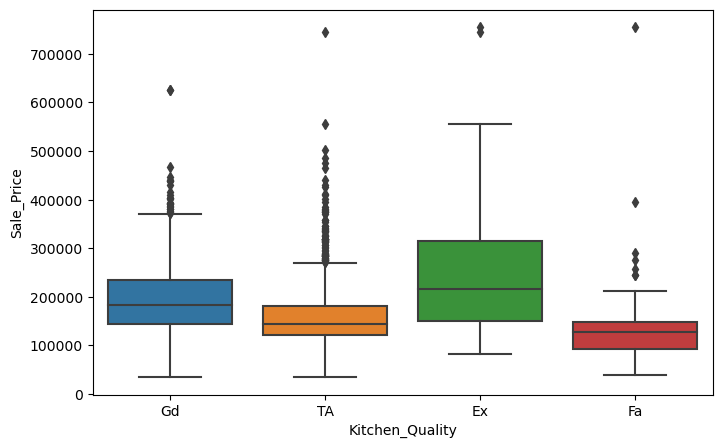

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(y= categDf["Sale_Price"], x=categDf["Kitchen_Quality"])
plt.show()

#### Road_Type

- Paved has significantly more outliers than Gravel
- Q4 of Paved is almost void.
- Paved impacts Sale_Price more than Gravel


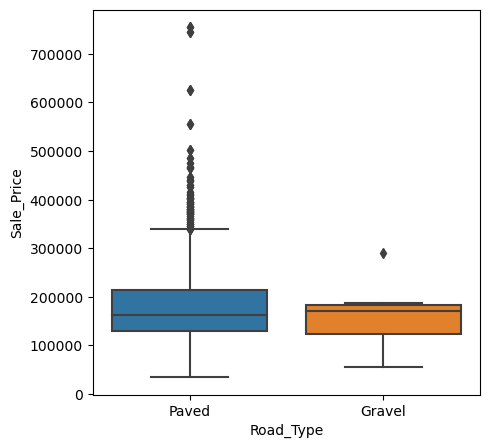

In [33]:
plt.figure(figsize=(5,5))
sns.boxplot(y= categDf["Sale_Price"], x=categDf["Road_Type"])
plt.show()